Original block: 010000100<b>1</b>00<b>1</b><b>1</b>01100010100<b>1</b>1<b>0</b><b>1</b>0<b>0</b>0<b>0</b>0<b>0</b><b>0</b>01100<b>0</b><b>0</b>00<b>0</b>000000<b>0</b><b>0</b><b>0</b><b>0</b>00<b>0</b><b>0</b>0<b>0</b>0<b>0</b><b>0</b><b>0</b>0<b>0</b><b>0</b>00000<b>0</b><b>0</b><b>0</b><b>0</b>0<b>0</b>10<b>0</b><b>0</b>10<b>1</b><b>0</b><b>0</b><b>0</b>00<b>0</b><b>0</b>0<b>0</b>0<b>0</b>0<b>0</b><b>0</b>000<b>0</b>0<b>0</b><b>0</b><b>0</b>00<b>0</b><b>0</b><b>1</b>111<b>1</b>0<b>0</b><b>0</b>00<b>0</b><b>0</b><b>0</b>0<b>0</b><b>0</b><b>0</b>0000000<b>0</b>0<b>0</b><b>0</b>0<b>0</b>010<b>1</b>0<b>1</b><b>0</b>10<b>0</b>00<b>0</b>0<b>0</b>0<b>1</b>0<b>0</b><b>0</b>00000000<b>0</b><b>0</b>00001<b>0</b>01<b>0</b><b>0</b>0<b>0</b>00<b>0</b>0<b>0</b><b>0</b>100000000<b>0</b>0<b>0</b><b>0</b><b>0</b>0000<b>0</b>000<b>0</b>0100<b>0</b><b>0</b><b>0</b>0<b>0</b><b>0</b><b>0</b>001100000<b>0</b><b>0</b>00<b>0</b><b>0</b><b>0</b><b>0</b>000000<b>0</b>0<b>0</b>0<b>0</b>0<b>0</b><b>0</b>
Encryp

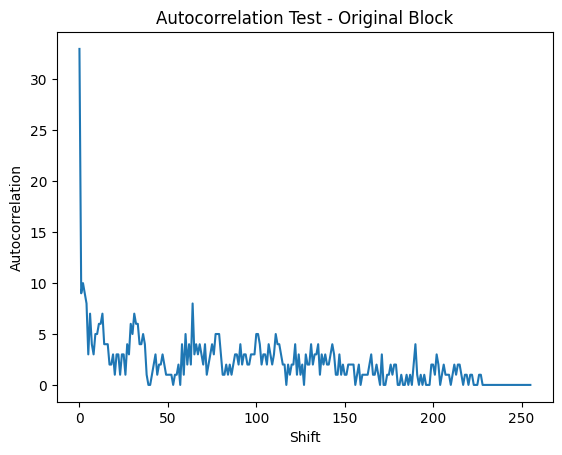

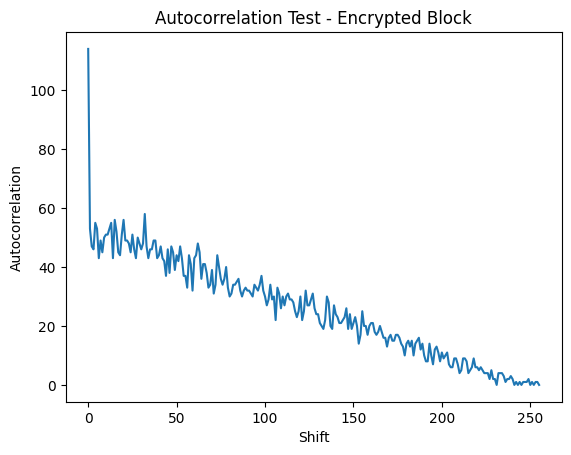

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from bitstring import BitArray

# Замените пути на свои
ORIGINAL_FILE_PATH = 'C:\\Users\\dryag\\Documents\\cryptography\\rc6\\input.bmp'
ENCRYPTED_FILE_PATH = 'C:\\Users\\dryag\\Documents\\cryptography\\rc6\\img_e_expirement2.bmp'

def read_bytes(file_path):
    with open(file_path, 'rb') as file:
        return file.read()

def autocorrelation_test(data):
    # Преобразование строки битов в массив чисел
    data_array = np.array(list(map(int, data)))
    autocorrelation = np.correlate(data_array, data_array, mode='full')
    return autocorrelation[len(autocorrelation)//2:]

def plot_autocorrelation(data, title):
    autocorrelation = autocorrelation_test(data)
    plt.plot(autocorrelation)
    plt.title(title)
    plt.xlabel('Shift')
    plt.ylabel('Autocorrelation')
    plt.show()

def main():
    original_data = read_bytes(ORIGINAL_FILE_PATH)
    encrypted_data = read_bytes(ENCRYPTED_FILE_PATH)

    # Преобразование байтов в битовые последовательности
    original_bits = BitArray(bytes=original_data).bin
    encrypted_bits = BitArray(bytes=encrypted_data).bin

    # Анализ изменения битов на позициях блока (пример)
    # Вам может потребоваться изменить эту часть в зависимости от вашего конкретного теста

    # Выберите блок битов для анализа (пример: первые 1000 бит)
    block_size = 256
    original_block = original_bits[:block_size]
    encrypted_block = encrypted_bits[:block_size]

    # Вывод результатов анализа
    print_diff_bits(original_block, encrypted_block)

    # Построение графика автокорреляционного теста
    plot_autocorrelation(original_block, "Autocorrelation Test - Original Block")
    plot_autocorrelation(encrypted_block, "Autocorrelation Test - Encrypted Block")


def print_diff_bits(original_block, encrypted_block):
    diff_bits = [f'<b>{original}</b>' if original != encrypted else original for original, encrypted in zip(original_block, encrypted_block)]
    original_with_diff = ''.join(diff_bits)
    print("Original block:", original_with_diff)
    print("Encrypted block:", encrypted_block)


if __name__ == "__main__":
    main()
